In [1]:
# Import needed Libraries

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [2]:
data = pd.read_csv('housing.csv') #reading the California Housing data

In [3]:
data.head() #To peek into the data set to see what it looks like (the first 5 rows)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data.info() #have view the data types, number of rows(you can see that total_bedroom has 20433 out of 20640)
            #so total_bedroom has some missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# Looking at the categorical data('object') closely to observe the categories
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
data.describe() #to have an overview of the descriptive statistics 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Important to note:
- Counts: means the number of rows
- mean: shows the mean value in that feature (i.e average)
- std: means the standard deviation of that feature
- min: shows the minimum value of that feature
- max: shows the maximum value of that feature
- 25%: this is the 25 percentile which depicts the first(1st) quartile that shows the value below which a given percentage value fall e.g 25% of the latitude value falls below -121.8
- 50%:  this is the 50 percentile (a.ka median) which depicts the second(2nd) quartile that shows the value below which a given percentage value fall e.g 50% of the population value falls below 1166.0, making the 1166.0 the median value
- 75%: this is the 75 percentile which depicts the third(3rd) quartile that shows the value below which a given percentage value fall e.g 75% of the households value falls below 605.0

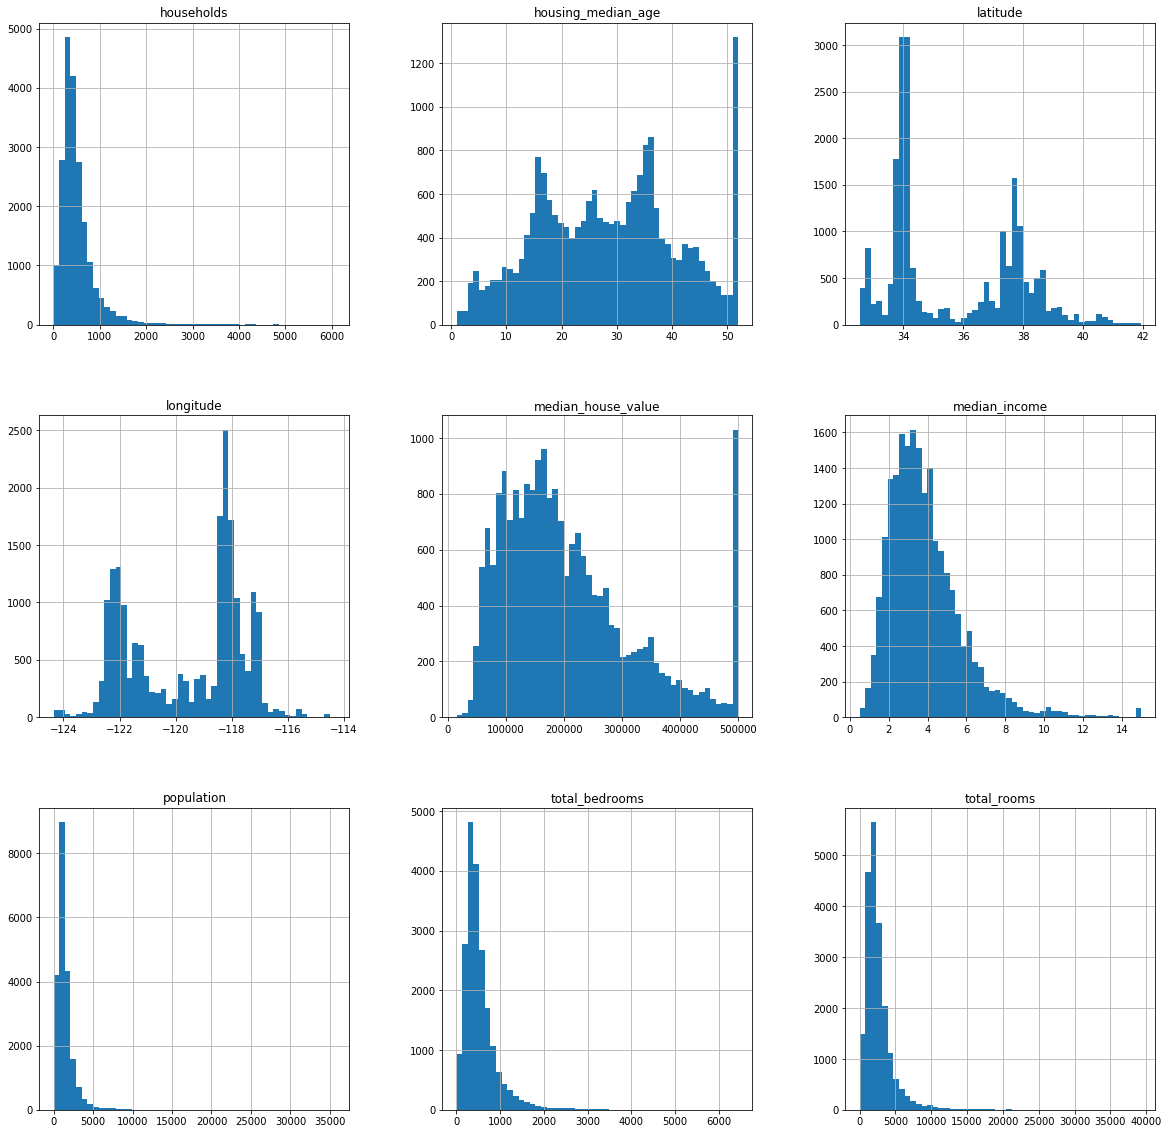

In [7]:
## view the histogram of the data set, to get feel of the data sets
data.hist(bins=50, figsize=(20,20))
plt.show()

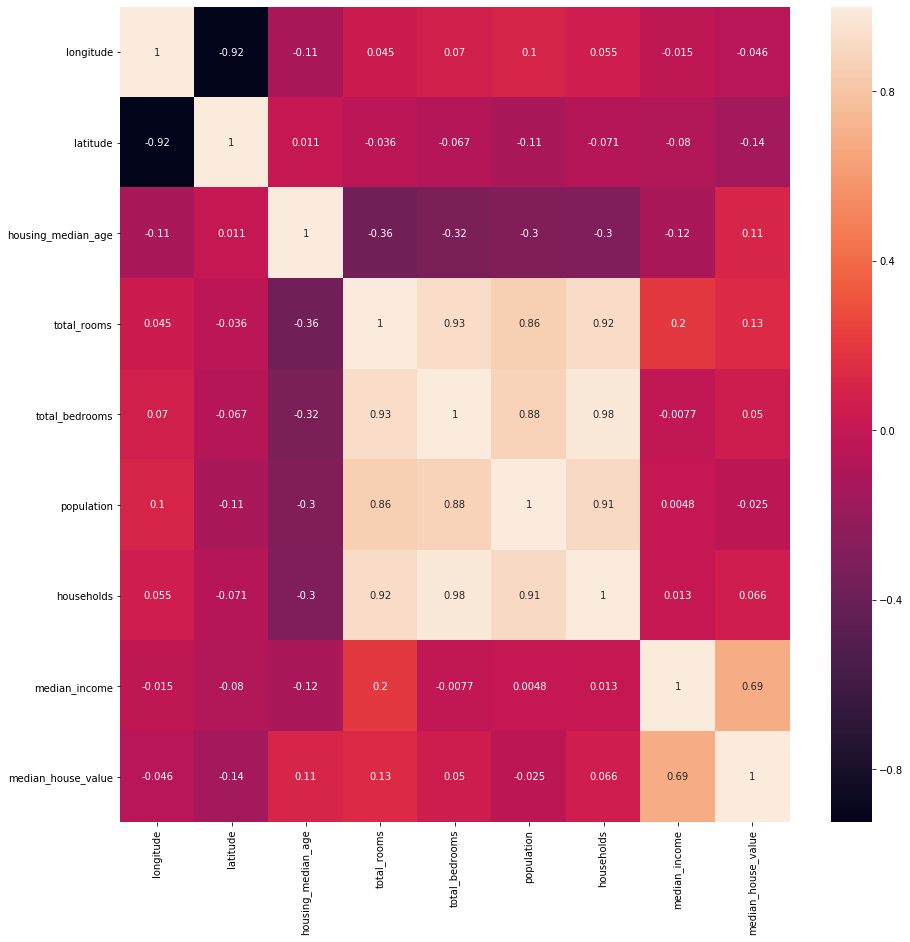

In [8]:
# Using a correlation to see features that are highly correlated to the target(here, median_housing_value)
cor = data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cor, annot=True)

It can be observed from the heatmap that median_income is highly correlated to the target, having '0.69', so lets look at the feature more closely.

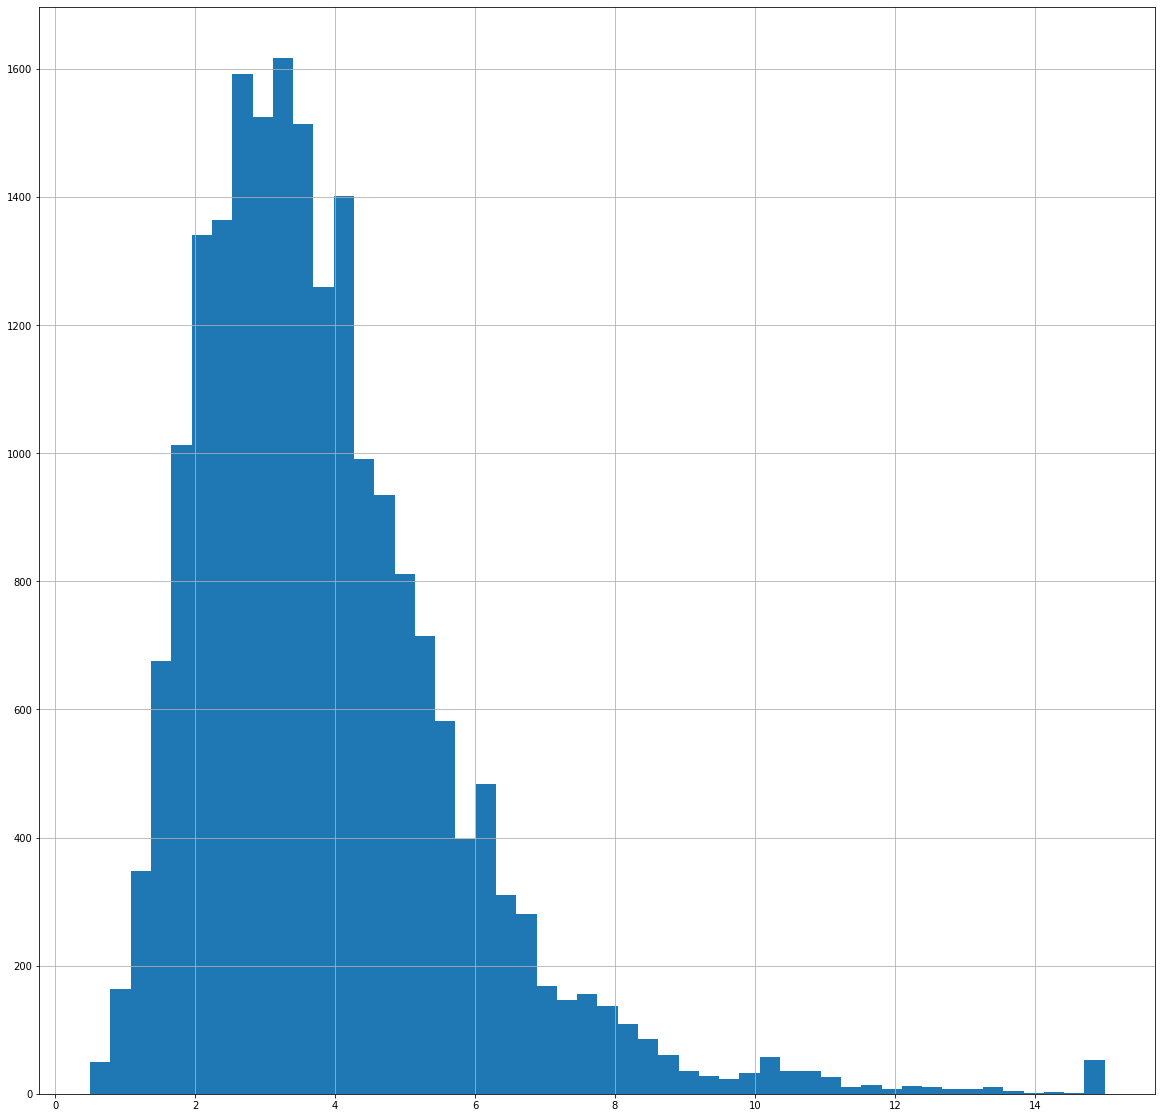

In [9]:
data['median_income'].hist(bins=50,figsize=(20,20))

### Using train_test_split approach to split the data

In [10]:
from sklearn.model_selection import train_test_split

#splitting the training data
train_set1, test_set1 = train_test_split(data, test_size=0.3, random_state=42)

In [11]:
train_set1.shape, test_set1.shape

((14448, 10), (6192, 10))

### Using StratifiedShuffleSplit approach to split the data

Since we have seen from the correlation heatmap that the 'median_income' feature is important. We will want our test set to be representative of the various categories of income in the whole dataset. If we look at the histogram of the 'median_income' we created before, you will observe that that most of median income values are clustered around 1.5 t0 7 (i.e $15,000-$70,000), but some 'median_income' values go far beyond 7. 

#### N/B: It is important to have a sufficient number of instances in your datasets for each stratum, or else the estimate of the stratum's importance may be biased. This means that you shouldn't have too much strata, and each stratum should be large enough. 

So we create 5 strata in this project.We will create 5 category attribute labeled 1 to 5(where label 1 depicts values from 0-2,label 2 depicts values from 2-4 an so on till label 5 depicts 8-inf which covers the remaining values on the histogram)

In [12]:
data['income_cat'] =pd.cut(data['median_income'], bins = [0., 2., 4., 6., 8.,np.inf], labels=[1,2,3,4,5])

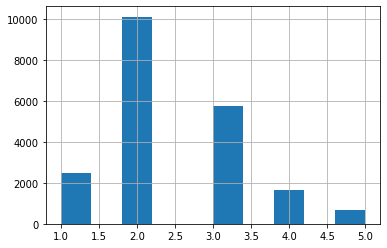

In [13]:
data['income_cat'].hist()

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits = 5, test_size = 0.3, random_state=42)
sss.get_n_splits(data)

sss = StratifiedShuffleSplit(n_splits= 5, test_size=0.3, random_state=42)
for train_index, test_index in sss.split(data,data['income_cat']):
    print('Train:', train_index, 'Test:', test_index)
    train_set2 = data.loc[train_index]
    test_set2 = data.loc[test_index]

Train: [ 6655   307 10606 ...   551 14779   775] Test: [14566  5872 14262 ... 14984  6901  9816]
Train: [ 4483 18769 13338 ...  2028 17558 14936] Test: [16113  6486  5580 ...   863 17747  8147]
Train: [14557  3564  2702 ... 14896  9507 11304] Test: [16919  9888 20468 ...  1821  8305 12434]
Train: [ 4021  5174  8867 ... 14532 14741  2193] Test: [18795  3212 16398 ...  3122  1176  7515]
Train: [16343 19527  5945 ... 16911   312  3818] Test: [ 4004  3451 17975 ... 15486  9861  8406]


In [15]:
# Let's check if it worked as expected as we observe the proportion
test_set2['income_cat'].value_counts()/ len(test_set2)

2    0.489180
3    0.277293
1    0.119025
4    0.081072
5    0.033430
Name: income_cat, dtype: float64

In [16]:
# so we should drop the income category, so the data is back to its original form
train_set2 = train_set2.drop('income_cat', axis=1)
test_set2 = test_set2.drop('income_cat', axis=1)

### or 
    
# for set_ in (train_set2,test_set2):
#     set_.drop('income_cat', axis=1, inplace = True )

In [17]:
train_set2.shape, test_set2.shape

((14448, 10), (6192, 10))

### in summary we had ((14448, 10), (6192, 10))) size for the train and test set for both approaches with different sampling techinques